In [1]:
# If in a notebook:
%matplotlib ipympl

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

from mpl_image_labeller import image_labeller
from src.image_diagnostics import standardize_image_array

In [3]:
DATA_DIR = Path('../../../../data/Streamflow/fpe_stations')
stations = sorted([f.stem for f in DATA_DIR.iterdir() if f.stem not in ['FOXRC', 'GREENR', 'LANESV', 'WESTKILL', 'VLYB']])


In [4]:
def open_and_resize_image(image_path):
    image = cv2.imread(str(image_path))
    image = standardize_image_array(image, is_bgr=True) # opencv reads images in BGR format
    image = image[int(image.shape[0] * 0.05):int(image.shape[0] * 0.85), :, :] # leave out the bottom 15% and top 5% of the image
    aspect_ratio = image.shape[1] / image.shape[0]
    new_width = 512
    new_height = int(new_width / aspect_ratio)
    image_small = cv2.resize(image, (new_width, new_height))
    return image_small

In [5]:
image_paths = []
image_stations = []
images = []

for station in stations:
    station_images = pd.read_csv(DATA_DIR / station / 'FLOW_CFS' / 'images.csv')
    station_images_sample = station_images.sample(10)

    for i in tqdm(range(10)):
        image_path = DATA_DIR / station / 'FLOW_CFS' / station_images_sample.iloc[i]['filename']
        image = open_and_resize_image(image_path)

        image_paths.append(image_path)
        image_stations.append(station)
        images.append(image)
        

image_properties = {
    'station': image_stations,
    'image_path': image_paths,
    'image': images
}
image_properties_df = pd.DataFrame(image_properties)

100%|██████████| 10/10 [00:00<00:00, 14.21it/s]


In [6]:
print(len(image_properties_df))
image_properties_df.head()

110


,station,image_path,image
0,Avery Brook_Bridge_01171000,../../../../data/Streamflow/fpe_stations/Avery...,"[[[36, 36, 36], [39, 39, 39], [40, 40, 40], [3..."
1,Avery Brook_Bridge_01171000,../../../../data/Streamflow/fpe_stations/Avery...,"[[[55, 73, 55], [57, 81, 61], [60, 84, 63], [6..."
2,Avery Brook_Bridge_01171000,../../../../data/Streamflow/fpe_stations/Avery...,"[[[62, 60, 10], [39, 33, 0], [37, 30, 1], [42,..."
3,Avery Brook_Bridge_01171000,../../../../data/Streamflow/fpe_stations/Avery...,"[[[20, 20, 20], [13, 13, 13], [11, 11, 11], [1..."
4,Avery Brook_Bridge_01171000,../../../../data/Streamflow/fpe_stations/Avery...,"[[[166, 155, 108], [225, 208, 172], [167, 153,..."


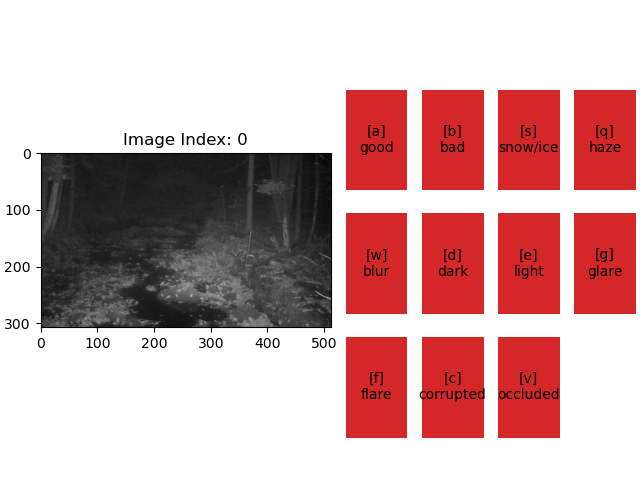

In [10]:
labeller = image_labeller(
    image_properties_df['image'].values,
    classes=["good", "bad", "snow/ice", "haze", "blur", "dark", "light", "glare", "flare", "corrupted", "occluded"],
    label_keymap=["a", "b", "s", "q", "w", "d", "e", "g", "f", "c", "v"],
    multiclass=True,
)
plt.show()

In [9]:
print(labeller.labels_onehot)

[[False False False ... False False False]
 [ True False False ... False False False]
 [ True False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
